# FSD audio classification - data preprocessing

Data preprocessing inspired by [this notebook](https://github.com/sevenfx/fastai_audio/blob/master/notebooks/02.%20NSynth%20(Audio%20Classification%20by%20Generating%20Images).ipynb).

## Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [67]:
from pathlib import Path
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
from tqdm import tqdm_notebook as tqdm
from fastai.vision import open_image

np.random.seed(12)

## Data

In [64]:
PATH = Path('data/FSDKaggle2018')

labels_train = pd.read_csv(list(iter((PATH/'meta').glob('*')))[1])
labels_test = pd.read_csv(list(iter((PATH/'meta').glob('*')))[0])

len(list(iter((PATH/'audio_train').glob('*')))), len(list(iter((PATH/'audio_test').glob('*'))))

(9473, 1600)

In [57]:
labels_train.head()

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution


## Make spectrograms

In [50]:
def audio2mel(fname, dir_audio, dir_imgs):
    x, sample_rate = sf.read(dir_audio/fname)

    n_fft = 1024
    hop_length = 256
    n_mels = 40
    fmin = 20
    fmax = sample_rate / 2 

    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft, 
                                                    hop_length=hop_length, 
                                                    n_mels=n_mels, power=2.0, 
                                                    fmin=fmin, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    dst_fname = dir_imgs / (fname.split('.')[0] + '.png')
    plt.imsave(dst_fname, mel_spec_db)

In [54]:
dir_audio = PATH/'audio_train'
dir_imgs = PATH/'imgs_train'

for fname in tqdm(labels_train['fname']):  
    audio2mel(fname, dir_audio, dir_imgs)

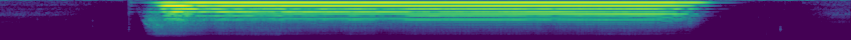

In [71]:
open_image(np.random.choice(dir_imgs.ls()))

In [66]:
dir_audio = PATH/'audio_test'
dir_imgs = PATH/'imgs_test'

for fname in tqdm(labels_test['fname']):  
    audio2mel(fname, dir_audio, dir_imgs)

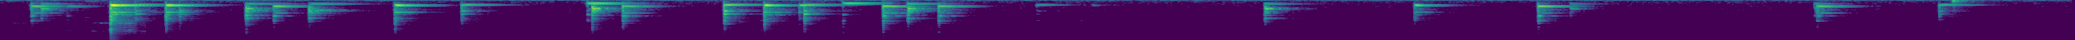

In [73]:
open_image(np.random.choice(dir_imgs.ls()))